In [785]:
#Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [26]:
#Storing the csvpaths
csvpath_confirmed="time_series_19-covid-Confirmed.csv"
csvpath_deaths="time_series_19-covid-Deaths.csv"
csvpath_recovered="time_series_19-covid-Recovered.csv"

In [27]:
#Reading into a pandas DataFrame
Confirmed_df1=pd.read_csv(csvpath_confirmed)
Deaths_df1=pd.read_csv(csvpath_deaths)
Recovered_df1=pd.read_csv(csvpath_recovered)

In [28]:
#Manipulating the Confirmed dataframe
#Dropping the colums which are not required
Confirmed_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)


In [29]:
#Filling NaN with a 0 for calculations
Confirmed_df1=Confirmed_df1.fillna(0)
Confirmed_df1.head()
#len(Confirmed_df1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,43,47,48,50,50,50,53,59,70,75
1,Japan,2,1,2,2,4,4,7,7,11,...,331,360,420,461,502,511,581,639,639,701
2,Singapore,0,1,3,3,4,5,7,7,10,...,110,117,130,138,150,150,160,178,178,200
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,50,50,83,93,99,117,129,149,149,197


In [30]:
#Grouping the Confirmed cases dataframe by Country/Region
Confirmed_group=Confirmed_df1.groupby(["Country/Region"])


#Creating the final Confirmed dataframe to be used further
Confirmed_final=Confirmed_group.sum()
Confirmed_final.head()
#len(Confirmed_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,4,4,5,7,7,7
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,10,12,23,33
Algeria,0,0,0,0,0,0,0,0,0,0,...,12,12,17,17,19,20,20,20,24,26
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#Manipulating the Deaths dataframe
#Dropping the colums which are not required
Deaths_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)


In [32]:
#Filling NaN with a 0 for calculations
Deaths_df1=Deaths_df1.fillna(0)
Deaths_df1.head()
#len(Confirmed_df1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,Japan,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,10,10,15,16,19
2,Singapore,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nepal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Malaysia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Grouping the Death cases dataframe by Country/Region
Deaths_group=Deaths_df1.groupby(["Country/Region"])


#Creating the final Death dataframe to be used further
Deaths_final=Deaths_group.sum()
Deaths_final.head()
#len(Deaths_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Manipulating the Recovered dataframe
#Dropping the colums which are not required
Recovered_df1.drop(columns=["Province/State","Lat","Long"],inplace=True)

In [35]:
#Filling NaN with a 0 for calculations
Recovered_df1=Recovered_df1.fillna(0)
Recovered_df1.head()
#len(Recovered_df1)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,Thailand,0,0,0,0,2,2,5,5,5,...,31,31,31,31,31,31,33,34,34,35
1,Japan,0,0,0,0,1,1,1,1,1,...,43,43,46,76,76,76,101,118,118,118
2,Singapore,0,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,78,96,96,97
3,Nepal,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,0,0,0,0,0,0,...,22,22,22,23,24,24,24,26,26,26


In [36]:
#Grouping the Recovered cases dataframe by Country/Region
Recovered_group=Recovered_df1.groupby(["Country/Region"])


#Creating the final Recovered dataframe to be used further
Recovered_final=Recovered_group.sum()
Recovered_final.head()
#len(Recovered_final)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [550]:
china_df=pd.DataFrame({
                    "#Cumulative Confirmed Cases":Confirmed_final.loc["China",:].tolist()
                   })
#US_df = US_df.set_index('Dates')
china_df.tail()

,#Cumulative Confirmed Cases
47,80860
48,80887
49,80921
50,80932
51,80945


In [551]:
china_df_model = china_df
#china_df_model.head()

In [552]:
china_df_model_mean = china_df_model.rolling(window = 7).mean()
china_df_model_mean.head()

,#Cumulative Confirmed Cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


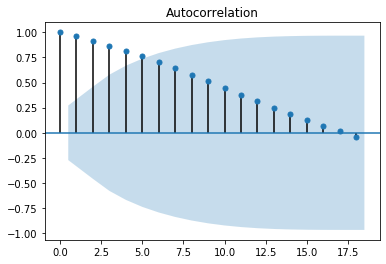

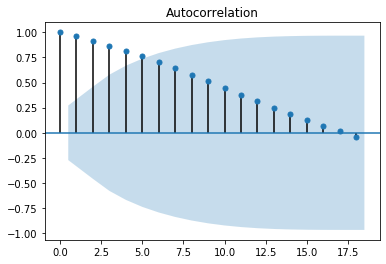

In [553]:
#ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)
#plot_acf is to identify parameter q
#plot_pacf is to identify parameter p
#ARIMA (p,d,q)

plot_acf(china_df_model)

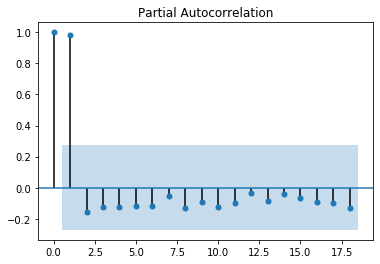

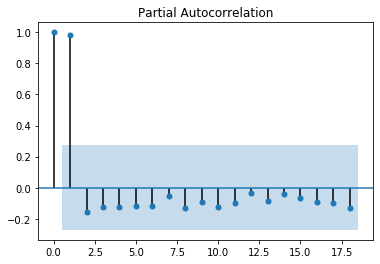

In [554]:
plot_pacf(china_df_model)

In [630]:
train_parameter_china = 52

In [631]:
# p = 0,1  d = 0,1  q = 0,1,2,3,4,5
#china_df_model.size >>> 52
china_df_train = china_df_model[0:train_parameter_china]
china_df_test = china_df_model[train_parameter_china:52]
forecast_step_china = china_df_test.size
forecast_step_china

0

In [632]:
china_model = ARIMA(china_df_train, order=(1,0,1))

In [633]:
china_model_fit = china_model.fit()
china_model_fit.aic

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


976.3933891667897

In [634]:
china_forecast = china_model_fit.forecast(steps = 14)[0]
china_forecast

array([80973.47364515, 81006.06012102, 81038.61875756, 81071.14957855,
       81103.65260775, 81136.12786891, 81168.57538574, 81200.99518195,
       81233.38728122, 81265.75170721, 81298.08848358, 81330.39763393,
       81362.67918186, 81394.93315097])

In [638]:
#np.sqrt(mean_squared_error(china_df_test,china_forecast))

In [639]:
#china_df_test

In [640]:
china_predict_df= pd.DataFrame({"#Cumulative Predictive Cases":china_forecast.tolist()})
china_predict_df.head()

,#Cumulative Predictive Cases
0,80973.473645
1,81006.060121
2,81038.618758
3,81071.149579
4,81103.652608


In [642]:
china_prelim_predict_df = pd.concat([china_df, china_predict_df],sort=False, ignore_index=True)
china_prelim_predict_df.loc[[51],'#Cumulative Predictive Cases'] = 80945.0
china_prelim_predict_df.tail(15)

,#Cumulative Confirmed Cases,#Cumulative Predictive Cases
51,80945.0,80945.000000
52,NaN,80973.473645
53,NaN,81006.060121
54,NaN,81038.618758
55,NaN,81071.149579
56,NaN,81103.652608
57,NaN,81136.127869
58,NaN,81168.575386
59,NaN,81200.995182
60,NaN,81233.387281


In [643]:
len(china_prelim_predict_df)

66

In [791]:
china_prelim_predict_df['date'] = pd.date_range(start='1/22/2020',periods=len(china_prelim_predict_df),freq='D')
china_prelim_predict_df.head()

,#Cumulative Confirmed Cases,#Cumulative Predictive Cases,date
0,548.0,NaN,2020-01-22
1,643.0,NaN,2020-01-23
2,920.0,NaN,2020-01-24
3,1406.0,NaN,2020-01-25
4,2075.0,NaN,2020-01-26


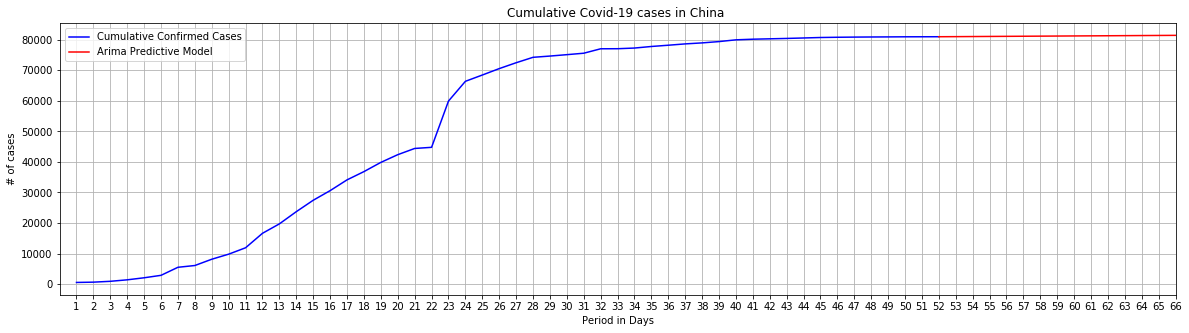

In [763]:
plt.figure(figsize=(20,5))
x_axis = np.arange(1, len(china_prelim_predict_df)+1)
tick_locations_china = []
for x in x_axis:
    tick_locations_china.append(x)
    
plt.title("Cumulative Covid-19 cases in China ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(0,len(china_prelim_predict_df)-1)
    
confirmed_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases")
arima_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cumulative Predictive Cases'], color ='red', label = 'Arima Predictive Model')

plt.legend(handles=[confirmed_cases_china, arima_cases_china], loc="upper left")
plt.xticks(tick_locations_china)

plt.show()

In [645]:
US_df=pd.DataFrame({
                    "#Cumulative Confirmed Cases":Confirmed_final.loc["US",:].tolist()
                   })
#US_df = US_df.set_index('Dates')
US_df.tail()

,#Cumulative Confirmed Cases
47,583
48,959
49,1281
50,1663
51,2179


In [646]:
US_df_model = US_df
#US_df_model.head()

In [647]:
US_df_model_mean = US_df_model.rolling(window = 7).mean()
US_df_model_mean.head()

,#Cumulative Confirmed Cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


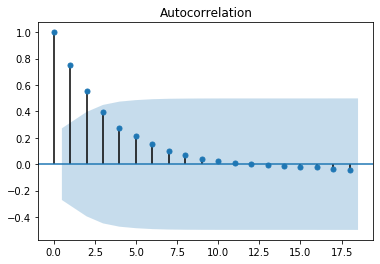

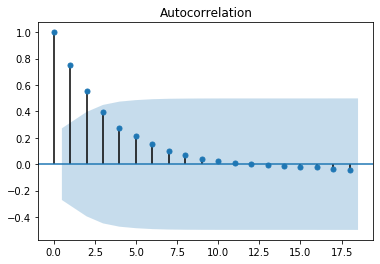

In [648]:
#ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)
#plot_acf is to identify parameter q
#plot_pacf is to identify parameter p
#ARIMA (p,d,q)

plot_acf(US_df_model)

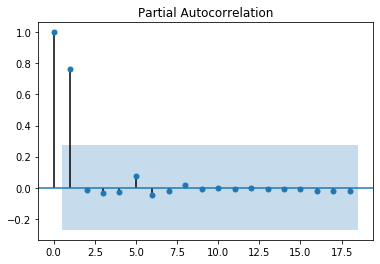

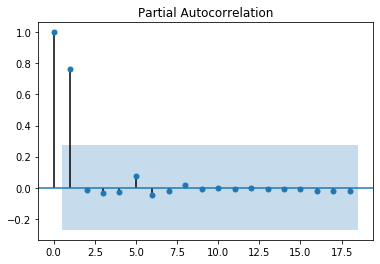

In [649]:
plot_pacf(US_df_model)

In [652]:
china_df.head(6)

,#Cumulative Confirmed Cases
0,548
1,643
2,920
3,1406
4,2075
5,2877


In [651]:
US_df.tail()

,#Cumulative Confirmed Cases
47,583
48,959
49,1281
50,1663
51,2179


In [653]:
train_parameter_US = 6

In [655]:
# p = 0,1  d = 0,1  q = 0,1,2
#US_df_model.size >>> 52
US_df_train = china_df_model[0:train_parameter_US]
US_df_test = US_df_model[train_parameter_US:20]
forecast_step_US = US_df_test.size
forecast_step_US

14

In [709]:
US_model = ARIMA(US_df_train, order=(1,2,0))

In [710]:
US_model_fit = US_model.fit()
US_model_fit.aic

43.8508458686848

In [711]:
US_forecast = US_model_fit.forecast(steps = forecast_step_US)[0]
US_forecast

array([ 3852.26619562,  5003.44298022,  6330.70401849,  7834.06071546,
        9513.51382015, 11369.06338174, 13400.70940345, 15608.45188551,
       17992.29082793, 20552.22623071, 23288.25809384, 26200.38641733,
       29288.61120117, 32552.93244538])

In [712]:
np.sqrt(mean_squared_error(US_df_test,US_forecast))

18268.231720408734

In [713]:
US_df_test.head()

,#Cumulative Confirmed Cases
6,5
7,5
8,5
9,7
10,8


In [714]:
US_predict_df= pd.DataFrame({"#Cumulative Predictive Cases":US_forecast.tolist()})
US_predict_df.head()

,#Cumulative Predictive Cases
0,3852.266196
1,5003.442980
2,6330.704018
3,7834.060715
4,9513.513820


In [715]:
US_prelim_predict_df = pd.concat([US_df, US_predict_df],sort=False, ignore_index=True)
US_prelim_predict_df.loc[[51],'#Cumulative Predictive Cases'] = 2179.0
US_prelim_predict_df.head()

,#Cumulative Confirmed Cases,#Cumulative Predictive Cases
0,1.0,NaN
1,1.0,NaN
2,2.0,NaN
3,2.0,NaN
4,5.0,NaN


In [716]:
#US_df_model_mean.iloc[0:52,:]
len(US_prelim_predict_df)

66

In [790]:
US_prelim_predict_df['date'] = pd.date_range(start='1/22/2020',periods=len(US_prelim_predict_df),freq='D')
US_prelim_predict_df.head()

,#Cumulative Confirmed Cases,#Cumulative Predictive Cases,date
0,1.0,NaN,2020-01-22
1,1.0,NaN,2020-01-23
2,2.0,NaN,2020-01-24
3,2.0,NaN,2020-01-25
4,5.0,NaN,2020-01-26


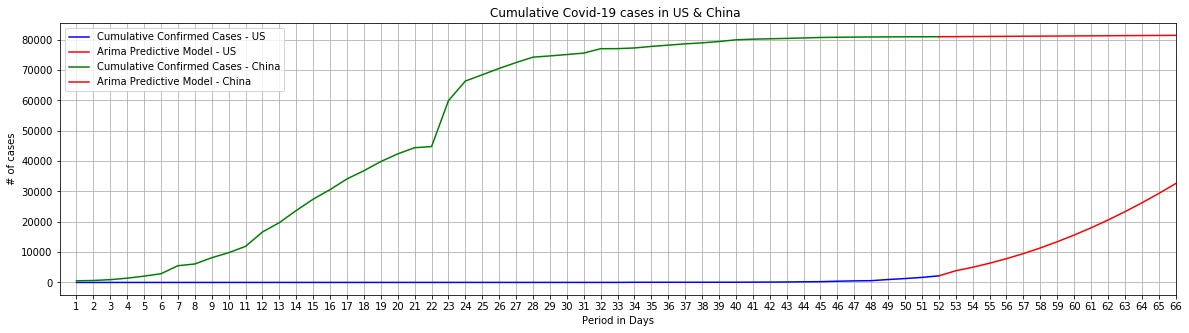

In [761]:
plt.figure(figsize=(20,5))
x_axis = np.arange(1, len(US_prelim_predict_df)+1)
tick_locations_US = []
for x in x_axis:
    tick_locations_US.append(x)
    
plt.title("Cumulative Covid-19 cases in US & China ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(0,len(US_prelim_predict_df)-1)
    
confirmed_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases - US")
arima_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cumulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - US')
confirmed_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cumulative Confirmed Cases'], color="green", label="Cumulative Confirmed Cases - China")
arima_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cumulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - China')

plt.legend(handles=[confirmed_cases_US, arima_cases_US,confirmed_cases_china,arima_cases_china], loc="upper left")
plt.xticks(tick_locations_US)

plt.show()

In [718]:
canada_df=pd.DataFrame({
                    "#Cumulative Confirmed Cases":Confirmed_final.loc["Canada",:].tolist()
                   })
#canada_df = US_df.set_index('Dates')
canada_df.tail()

,#Cumulative Confirmed Cases
47,77
48,79
49,108
50,117
51,193


In [719]:
canada_df_model = canada_df
#canada_df_model.head()

In [720]:
canada_df_model_mean = canada_df_model.rolling(window = 7).mean()
canada_df_model_mean.head()

,#Cumulative Confirmed Cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


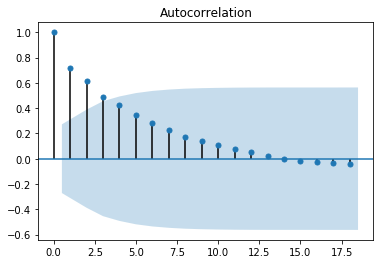

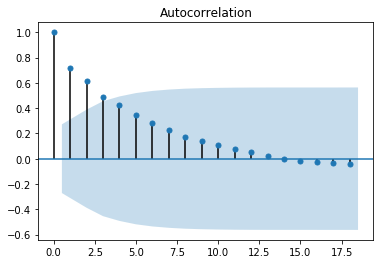

In [721]:
#ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)
#plot_acf is to identify parameter q
#plot_pacf is to identify parameter p
#ARIMA (p,d,q)

plot_acf(canada_df_model)

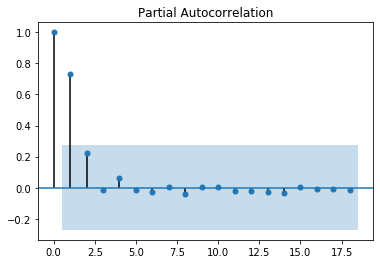

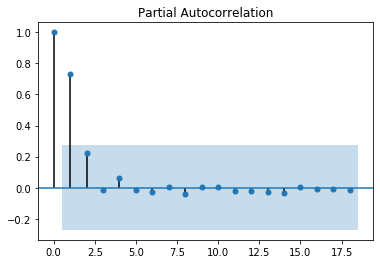

In [722]:
#ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)
#plot_acf is to identify parameter q
#plot_pacf is to identify parameter p
#ARIMA (p,d,q)

plot_pacf(canada_df_model)

In [724]:
china_df.head()

,#Cumulative Confirmed Cases
0,548
1,643
2,920
3,1406
4,2075


In [725]:
canada_df.tail()

,#Cumulative Confirmed Cases
47,77
48,79
49,108
50,117
51,193


In [738]:
train_parameter_canada = 4

In [740]:
# p = 0,1,2  d = 0,1  q = 0,1,2,3
#canada_df_model.size >>> 52
canada_df_train = china_df[0:train_parameter_canada]
canada_df_test = canada_df_model[train_parameter_canada:18]
forecast_step_canada = canada_df_test.size
forecast_step_canada

14

In [752]:
canada_model = ARIMA(canada_df_train, order=(1,1,0))

In [753]:
canada_model_fit = canada_model.fit()
canada_model_fit.aic

44.955352728349965

In [754]:
canada_forecast = canada_model_fit.forecast(steps = 14)[0]
canada_forecast

array([1691.35842464, 1977.35242989, 2263.34442177, 2549.33642004,
       2835.32841828, 3121.32041653, 3407.31241477, 3693.30441302,
       3979.29641126, 4265.28840951, 4551.28040775, 4837.272406  ,
       5123.26440424, 5409.25640249])

In [755]:
np.sqrt(mean_squared_error(canada_df_test,canada_forecast))

3728.715205973237

In [756]:
#canada_df_test.head()

In [757]:
canada_predict_df= pd.DataFrame({"#Cumulative Predictive Cases":canada_forecast.tolist()})
canada_predict_df.head()

,#Cumulative Predictive Cases
0,1691.358425
1,1977.352430
2,2263.344422
3,2549.336420
4,2835.328418


In [758]:
canada_prelim_predict_df = pd.concat([canada_df, canada_predict_df],sort=False, ignore_index=True)
canada_prelim_predict_df.loc[[51],'#Cumulative Predictive Cases'] = 193.0
canada_prelim_predict_df.head()

,#Cumulative Confirmed Cases,#Cumulative Predictive Cases
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,1.0,NaN


In [759]:
#canada_df_model_mean.iloc[0:52,:]
len(canada_prelim_predict_df)

66

In [815]:
canada_prelim_predict_df['date'] = pd.date_range(start='1/22/2020',periods=len(canada_prelim_predict_df),freq=None)
canada_prelim_predict_df.head()

,#Cumulative Confirmed Cases,#Cumulative Predictive Cases,date
0,0.0,NaN,2020-01-22
1,0.0,NaN,2020-01-23
2,0.0,NaN,2020-01-24
3,0.0,NaN,2020-01-25
4,1.0,NaN,2020-01-26


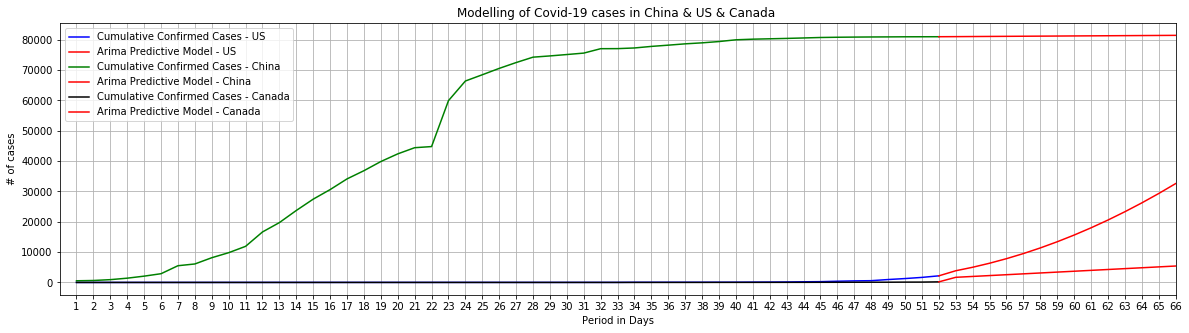

In [816]:
plt.figure(figsize=(20,5))
x_axis = np.arange(1, len(US_prelim_predict_df)+1)
tick_locations_US = []
for x in x_axis:
    tick_locations_US.append(x)
    
plt.title("Modelling of Covid-19 cases in China & US & Canada ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(0,len(US_prelim_predict_df)-1)
    
confirmed_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases - US")
arima_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cumulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - US')

confirmed_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cumulative Confirmed Cases'], color="green", label="Cumulative Confirmed Cases - China")
arima_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cumulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - China')

confirmed_cases_canada, = plt.plot(x_axis, canada_prelim_predict_df.loc[:,'#Cumulative Confirmed Cases'], color="black", label="Cumulative Confirmed Cases - Canada")
arima_cases_canada, = plt.plot(x_axis, canada_prelim_predict_df.loc[:,'#Cumulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - Canada')

plt.legend(handles=[confirmed_cases_US, arima_cases_US,confirmed_cases_china,arima_cases_china,confirmed_cases_canada,arima_cases_canada], loc="upper left")
plt.xticks(tick_locations_US)

plt.show()

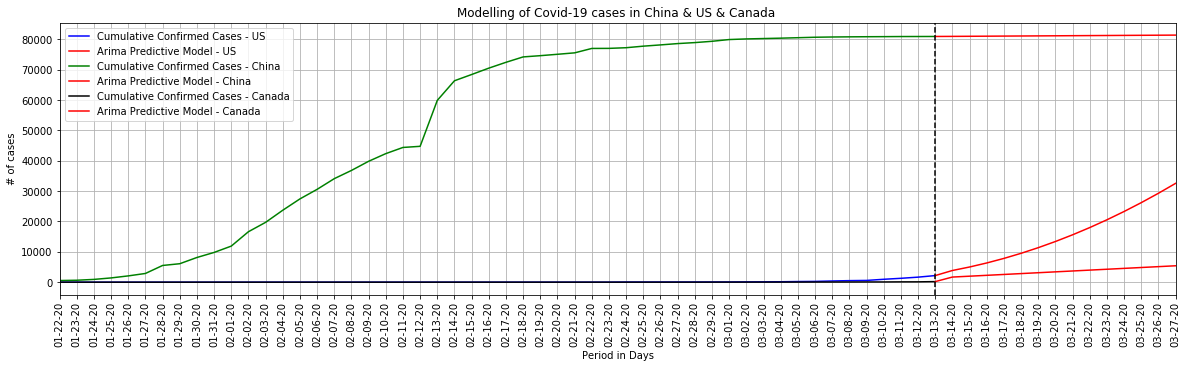

In [834]:
plt.figure(figsize=(20,5))
x_axis = np.arange(1, len(US_prelim_predict_df)+1)
tick_locations_US = []
for x in x_axis:
    tick_locations_US.append(x)
    
plt.title("Modelling of Covid-19 cases in China & US & Canada ")
plt.xlabel("Period in Days")
plt.ylabel("# of cases")
plt.grid()
plt.xlim(1,len(US_prelim_predict_df))
    
confirmed_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cumulative Confirmed Cases'], color="blue", label="Cumulative Confirmed Cases - US")
arima_cases_US, = plt.plot(x_axis, US_prelim_predict_df.loc[:,'#Cumulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - US')

confirmed_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cumulative Confirmed Cases'], color="green", label="Cumulative Confirmed Cases - China")
arima_cases_china, = plt.plot(x_axis, china_prelim_predict_df.loc[:,'#Cumulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - China')

confirmed_cases_canada, = plt.plot(x_axis, canada_prelim_predict_df.loc[:,'#Cumulative Confirmed Cases'], color="black", label="Cumulative Confirmed Cases - Canada")
arima_cases_canada, = plt.plot(x_axis, canada_prelim_predict_df.loc[:,'#Cumulative Predictive Cases'], color ='red', label = 'Arima Predictive Model - Canada')

plt.legend(handles=[confirmed_cases_US, arima_cases_US,confirmed_cases_china,arima_cases_china,confirmed_cases_canada,arima_cases_canada], loc="upper left")
plt.xticks(x_axis,US_prelim_predict_df['date'].dt.strftime('%m-%d-%y'),rotation ='vertical')
plt.axvline(x=52, color='k', linestyle='--')

plt.show()